In [21]:
# Imports
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d

In [22]:
### Reading Provided Data

In [23]:
# File Names
spec_file = 'cs-137_spectrum.csv'
xs_file = '/Users/briannaryan/Desktop/CEvNS/Detector Material Comparison/aluminum_xs_exp.csv'

In [24]:
# Read Spectrum CSV File
energies = []
counts = []

with open(spec_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies.append(float(row[0])*10**3)
        counts.append(float(row[1]))

In [25]:
# Read XS csv file
energies_xs = []
xs = []

with open(xs_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies_xs.append(float(row[0]))
        xs.append(float(row[1]))

In [26]:
# As the functions are defined by slightly different energies, I interpolate
xs_i = interp1d(energies_xs, xs)
counts_i = interp1d(energies, counts)

In [27]:
### Defining All Variables

In [28]:
# Defining Known Variables
N_A = 6.0221408*10**(23)  #atoms/mole
A = 112*0.0097+114*0.0065+115*0.0034+116*0.1454+117*0.0768+118*0.2422+119*0.0858+120*0.3259+122*0.0463+124*0.0579
mu = 3.10

In [29]:
# Calculate Weighted Average XS
avg = []
weights = []
prob = 0
for e in energies[793:]:
    avg.append(xs_i(e)*counts_i(e))
    weights.append(counts_i(e))
    prob += counts_i(e)
    
avg_xs = sum(avg)/sum(weights)
print(avg_xs)
print(prob)

2.123714207789964e-43
0.023951291089069335


In [30]:
# Combining Knowns
constant_term = (4*math.pi*mu*A)/(avg_xs*10**(-4)*N_A*1000000*0.5*prob)  # Remove source_flux from denom
print(constant_term)

3.021544027438119e+22


In [31]:
### Final Calculations

In [32]:
# Now lets break it down! Starting with r=1m
M_s = range(1, 1000000000000, 1000000)  # Mega to Peta

r1 = 1
M_dec_r1 = []
for m in M_s:
    M_dec_r1.append(constant_term*r1**2/(m*60*1000000))

r2 = 2
M_dec_r2 = []
for m in M_s:
    M_dec_r2.append(constant_term*r2**2/(m*60*1000000))
    
r3 = 3
M_dec_r3 = []
for m in M_s:
    M_dec_r3.append(constant_term*r3**2/(m*60*1000000))

r4 = 5
M_dec_r4 = []
for m in M_s:
    M_dec_r4.append(constant_term*r4**2/(m*60*1000000))

r5 = 10
M_dec_r5 = []
for m in M_s:
    M_dec_r5.append(constant_term*r5**2/(m*60*1000000))

In [33]:
M_s_new = []
for m in M_s :
    M_s_new.append(m*10**6)

Text(0, 0.5, 'Detector Mass (ton-min)')

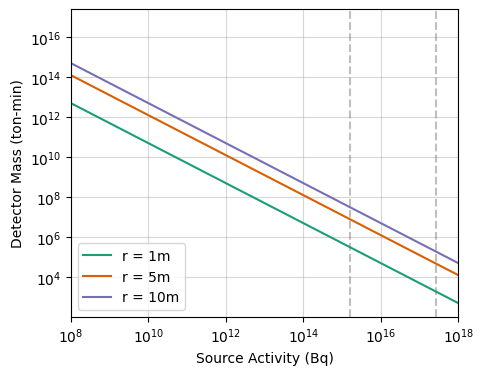

In [34]:
plt.figure(figsize=(5,4))
plt.xlim(10**8, 10**18)

plt.axvline(x=1.607*10**15, color='grey', ls='dashed', alpha=0.5)
plt.axvline(x=2.667*10**17, color='grey', ls='dashed', alpha=0.5)
plt.plot(M_s_new, M_dec_r1, color='#1b9e77', label='r = 1m')
#plt.plot(M_s_new, M_dec_r2, color='red', label='r = 2m')
#plt.plot(M_s_new, M_dec_r3, color='#d95f02', label='r = 3m')
plt.plot(M_s_new, M_dec_r4, color='#d95f02', label='r = 5m')
plt.plot(M_s_new, M_dec_r5, color='#7570b3', label='r = 10m')
plt.grid(which='both', alpha=0.5)

plt.legend()
plt.xlabel('Source Activity (Bq)')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Detector Mass (ton-min)')
#plt.savefig('Cs-137_exp_results.pdf')

In [17]:
# Use as calculator 
md = constant_term * 1**2 * 1000000/(1.607*10**15*60*1000000)
print("500g Detection @ 1m: " + str(md))
md = constant_term * 5**2 * 1000000/(1.607*10**15*60*1000000)
print("500g Detection @ 5m: " + str(md))

md_2 = constant_term * 1**2 * 1000000/(2.667*10**17*60*1000000)
print("83kg Detection @ 1m: " + str(md_2))
md_2 = constant_term * 5**2 * 1000000/(2.667*10**17*60*1000000)
print("83kg Detection @ 5m: " + str(md_2))

500g Detection @ 1m: 313373.1619413108
500g Detection @ 5m: 7834329.048532771
83kg Detection @ 1m: 1888.2289885252587
83kg Detection @ 5m: 47205.72471313147
